In [3]:
from dash import Dash, html, dcc, dash_table, html, Input, Output
import dash_auth
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import date, datetime, timezone
import pytz

from pathlib import Path  

import wartsila_asana_utils as wa
import asana

C:\Users\dha042\Documents\W_Development\Resource_Planning\resource_venv\lib\site-packages\dash_auth\plotly_auth.py:16: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\dha042\Documents\W_Development\Resource_Planning\resource_venv\lib\site-packages\dash_auth\plotly_auth.py:17: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


# Old Stuff

In [2]:
# #------------------------------------------
# # Asana Data 
# rsc_task_list = wa.get_api_rsc_tasks()
# df_tasks = wa.make_rsc_tasks_df(rsc_task_list)
# df_tasks = wa.prep_task_display_table(df_tasks)

# #Preliminary Data Processing

# ## Unassigned - Cx
# # get all cx 'unassigned' tasks (denoted by 'Antti Pitkanen' as assignee)
# df_t = df_tasks.copy()
# df_t = df_t[df_t['assignee_name']=='Antti Pitkänen']

# ## Reference Cx Personnel
# pdb_list = wa.get_persondb_api_data()
# df_personnel_master = wa.make_persondb_df(pdb_list)
# df_p_all = df_personnel_master.copy()

# cx_all_persons = df_p_all[df_p_all['role'].isin(['Commissioning Manager', 'Commissioning Engineer'])].sort_values('region')
# cx_all_persons_count = cx_all_persons['person_name'].nunique()
# list_all_cx_persons = cx_all_persons['person_name'].tolist()


# ## Assigned - Cx
# # Get tasks assigned to Cx Managers or Cx Engineers
# roles_list = ['Commissioning Manager', 'Commissioning Engineer']
# df_ass = df_tasks.copy()
# df_ass = df_ass[df_ass['role'].isin(roles_list)]

# # exclude unassigned tasks
# df_ass = df_tasks.copy()
# exclude_assignee_list = ['Antti Pitkänen', 'unassigned']
# df_ass = df_ass[~df_ass['assignee_name'].isin(exclude_assignee_list)]

# # compare assignees against master list
# df_ass = df_ass[df_ass['assignee_name'].isin(cx_all_persons['person_name'].to_list())]

# ## Assigned and Unassigned 
# df_cx_all = pd.concat([df_t, df_ass])


# ## Time Reference 
# start = pd.Timestamp('1/1/2022')
# end = pd.Timestamp('1/1/2024')
# tindex = pd.date_range(start, end)
# df_dater2 = pd.DataFrame(tindex, columns=['date'])

# #------------------------------------------
# # Utility Functions - todo separate into separte module

# def get_num_unique_pjs_by_window(df, start_date, end_date):
#     df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['eso_project_name']
#     pj_count = df_out.nunique()
#     return pj_count

# def get_list_unique_pjs_by_window(df, start_date, end_date):
#     df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['eso_project_name']
#     pj_list = df_out.unique().tolist()
#     return pj_list

# def get_num_active_cxs(df, start_date, end_date):
#     df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['assignee_name']
#     person_count = df_out.nunique()
#     return person_count

# def get_list_active_cxs(df, start_date, end_date):
#     df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['assignee_name']
#     person_list = df_out.unique().tolist()
#     return person_list

# def get_list_available_cx_persons(df, start_date, end_date):
#     active_cx = get_list_active_cxs(df, start_date, end_date)
#     cx_avail = list(set(list_all_cx_persons) - set(active_cx))
#     return cx_avail

# def make_personnel_analysis_df(df_all, df_as, df_unas, max_prsn_available):
#     """
#     Parameters
#     ----------
#     df_all : pandas dataframe
#         all tasks to be used in this analysis
#     df_as : pandas dataframe
#         tasks that have an assignee
#     df_unas : pandas dataframe
#         tasks with no assignee (or by filtering to be treated as having to assignee)
#     max_prsn_available: int
#         maximum number of people capable of acting in role/capacity of interest
#         (note: # todo - upgrade max_prsn_available static value with a schedule of people hired/employed over time)
#     """
    
#     analysis_list = [{
#         'date' : r['date'],
#         'num_total_projects' : get_num_unique_pjs_by_window(df_all, r['date'], r['date']),
#         # 'num_total_tasks' : len(df_all.index)
#         'num_projects_no_assignee' : get_num_unique_pjs_by_window(df_unas, r['date'], r['date']),
#         'num_persons_occupied' : get_num_unique_pjs_by_window(df_as, r['date'], r['date']),                                                                 
#     } for _, r in df_dater2.iterrows()]
    
#     df = pd.DataFrame(analysis_list)
    
#     # todo - upgrade max_prsn_available static value with a schedule of people hired/employed over time
#     df['num_persons_available'] = max_prsn_available - df['num_persons_occupied']
#     df['num_persons_supply'] = df['num_persons_available'] - df['num_projects_no_assignee']
    
#     return df

# #------------------------------------------
# # CX Analysis 
# df_cx_combo = make_personnel_analysis_df(df_cx_all, df_t, df_ass, cx_all_persons_count)


In [3]:
# selected_regions = ['AMER']

In [4]:
#     cx_all_persons_count_fil = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]['person_name'].nunique()
#     df_cx_all_fil = df_cx_all[df_cx_all['region'].isin(selected_regions)]
#     df_t_fil = df_t[df_t['region'].isin(selected_regions)]
#     df_ass_fil = df_ass[df_ass['region'].isin(selected_regions)]

#     # get analysis values
#     df_cx_combo_fil = make_personnel_analysis_df(df_cx_all_fil, df_t_fil, df_ass_fil, cx_all_persons_count_fil)

#     # output prep
#     df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
#     table_persons_ref = df_persons_reference.to_dict('records')

#     fig_daily_usage = px.area(df_cx_combo_fil, x='date', y='num_persons_supply', 
#        title=f'Combined Commissioning Manager and Engineer Supply over Time \n {selected_regions} <br>(people available) - (people needed)',
#         labels={'num_persons_supply': 'Available Supply (number of people)'})
#     #fig_daily_usage.update_traces(line_color='#00AA00')

#     temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
#     fig_cx_reg_gantt = px.timeline(temp_df_tim.sort_values('start_date'), x_start="start_date", x_end="due_date", y="eso_project_name", color='assignee_name')
#     fig_cx_reg_gantt.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
#     fig_cx_reg_gantt.update_xaxes(
#         dtick="M1",
#         tickformat="%b\n%Y")
#     fig_cx_reg_gantt.update_xaxes(range=['2022-01-01', '2024-01-01'])

#     fig_total_pjs_reg = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Regions: {selected_regions}',
#         labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'})
#     fig_total_pjs_reg.update_xaxes(
#         dtick="M1",
#         tickformat="%b\n%Y")

In [5]:
# fig_cx_reg_gantt.show()
# fig_total_pjs_reg.show()
# fig_daily_usage.show()

In [6]:
# df_cx_combo_fil['query_region'] = 'AMER'
# df_cx_combo_fil

# New Monolith

In [4]:
#------------------------------------------
# Utility Functions - todo separate into separte module

def get_num_unique_pjs_by_window(df, start_date, end_date):
    df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['eso_project_name']
    pj_count = df_out.nunique()
    return pj_count

def get_list_unique_pjs_by_window(df, start_date, end_date):
    df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['eso_project_name']
    pj_list = df_out.unique().tolist()
    return pj_list

def get_num_active_cxs(df, start_date, end_date):
    df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['assignee_name']
    person_count = df_out.nunique()
    return person_count

def get_list_active_cxs(df, start_date, end_date):
    df_out = wa.filter_tasks_by_time_window(df, start_date, end_date)['assignee_name']
    person_list = df_out.unique().tolist()
    return person_list

def get_list_available_cx_persons(df, start_date, end_date):
    active_cx = get_list_active_cxs(df, start_date, end_date)
    cx_avail = list(set(list_all_cx_persons) - set(active_cx))
    return cx_avail

def make_personnel_analysis_df(df_all, df_as, df_unas, max_prsn_available):
    """
    Parameters
    ----------
    df_all : pandas dataframe
        all tasks to be used in this analysis
    df_as : pandas dataframe
        tasks that have an assignee
    df_unas : pandas dataframe
        tasks with no assignee (or by filtering to be treated as having to assignee)
    max_prsn_available: int
        maximum number of people capable of acting in role/capacity of interest
        (note: # todo - upgrade max_prsn_available static value with a schedule of people hired/employed over time)
    """
    
    ## Daily Time Reference 
    start = pd.Timestamp('1/1/2022')
    end = pd.Timestamp('1/1/2024')
    tindex = pd.date_range(start, end)
    df_dater2 = pd.DataFrame(tindex, columns=['date'])
    
    analysis_list = [{
        'date' : r['date'],
        'num_total_projects' : get_num_unique_pjs_by_window(df_all, r['date'], r['date']),
        # 'num_total_tasks' : len(df_all.index)
        'num_projects_no_assignee' : get_num_unique_pjs_by_window(df_unas, r['date'], r['date']),
        'num_persons_occupied' : get_num_unique_pjs_by_window(df_as, r['date'], r['date']),                                                                 
    } for _, r in df_dater2.iterrows()]
    
    df = pd.DataFrame(analysis_list)
    
    # todo - upgrade max_prsn_available static value with a schedule of people hired/employed over time
    df['num_persons_available'] = max_prsn_available - df['num_persons_occupied']
    df['num_persons_supply'] = df['num_persons_available'] - df['num_projects_no_assignee']
    
    return df

def make_project_groups(df):
    df['eso_sub_project'] = df['eso_project_name']

    #---- Dagget 3 Group
    daggett3_mask = df['eso_project_name'].str.contains('Daggett 3')
    df.loc[df['eso_project_name'].str.contains('Daggett 3'), 'eso_project_name']='Daggett 3 Group'
    daggett3_group_mask = df['eso_project_name'] == 'Daggett 3 Group'
    
    dag_ce_mask = (daggett3_group_mask) & (df['role']=='Commissioning Engineer')
    dag_cm_mask = (daggett3_group_mask) & (df['role']=='Commissioning Manager')
    
    df.loc[dag_ce_mask, 'eso_project_name'] = 'Daggett 3 Group CmEng'
    df.loc[dag_cm_mask, 'eso_project_name'] = 'Daggett 3 Group CmMgr'
    #----
    
    return df

In [5]:
def make_usage_analysis_table(df_in, show_graphs=False, save_graphs=False, use_pj_groups=True):
    
    if use_pj_groups:
        df_tasks = make_project_groups(df_in.copy())
        print('using groups')
    else:
        df_tasks = df_in.copy()
    ## Unassigned - Cx
    # get all cx 'unassigned' tasks (denoted by 'Antti Pitkanen' as assignee)
    df_t = df_tasks
    df_t = df_t[df_t['assignee_name']=='Antti Pitkänen']

    ## Reference Cx Personnel
    pdb_list = wa.get_persondb_api_data()
    df_personnel_master = wa.make_persondb_df(pdb_list)
    df_p_all = df_personnel_master.copy()

    cx_all_persons = df_p_all[df_p_all['role'].isin(['Commissioning Manager', 'Commissioning Engineer'])].sort_values('region')
    cx_all_persons_count = cx_all_persons['person_name'].nunique()
    list_all_cx_persons = cx_all_persons['person_name'].tolist()

    ## Assigned - Cx
    # Get tasks assigned to Cx Managers or Cx Engineers
    roles_list = ['Commissioning Manager', 'Commissioning Engineer']
    df_ass = df_tasks.copy()
    df_ass = df_ass[df_ass['role'].isin(roles_list)]

    # exclude unassigned tasks
    df_ass = df_tasks.copy()
    exclude_assignee_list = ['Antti Pitkänen', 'unassigned']
    df_ass = df_ass[~df_ass['assignee_name'].isin(exclude_assignee_list)]

    # verify assignees against master list
    # todo determine if we need to add region filter
    df_ass = df_ass[df_ass['assignee_name'].isin(cx_all_persons['person_name'].to_list())]

    ## Assigned and Unassigned 
    df_cx_all = pd.concat([df_t, df_ass])    
    
    region_options = ['AMER', 'EUAF', 'MEA']
    
    list_reg_collector = list()
    list_task_reg_collector = list()
    for reg in region_options:
        
        # convert to list (provisional to make use of existing code)
        selected_regions = [reg]
        cx_all_persons_count_fil = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]['person_name'].nunique()
            
        df_cx_all_fil = df_cx_all[df_cx_all['region'].isin(selected_regions)]
        df_t_fil = df_t[df_t['region'].isin(selected_regions)]
        df_ass_fil = df_ass[df_ass['region'].isin(selected_regions)]
        
        #-------Troubleshooting------------
#         print("--Selected Region--")
#         print(selected_regions)
#         print("--People Count--")
#         display(cx_all_persons_count)
        
#         print("--Personnel List--")
#         display(df_cx_all_fil)
        
#         print("--Not Assigned--")
#         display(df_t_fil)
        
#         print("--Assigned--")
#         display(df_ass_fil)
        #-----------------------------------

        # get analysis values
        df_cx_combo_fil = make_personnel_analysis_df(df_cx_all_fil, df_t_fil, df_ass_fil, cx_all_persons_count_fil)
        # Add region column
        df_cx_combo_fil['region'] = reg
        list_reg_collector.append(df_cx_combo_fil)
        
        temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
        temp_df_tim['region'] = reg
        list_task_reg_collector.append(temp_df_tim)
        
        # Dash output prep
        df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
        #display(df_persons_reference)
        
        
        if show_graphs or save_graphs:
            # output prep
            df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
            table_persons_ref = df_persons_reference.to_dict('records')
            
            fig_daily_usage = px.area(df_cx_combo_fil, x='date', y='num_persons_supply', 
               title=f'Combined Commissioning Manager and Engineer Supply over Time \n {selected_regions} <br>(people available) - (people needed)',
                labels={'num_persons_supply': 'Available Supply (number of people)'})
            fig_daily_usage.update_traces(line_color='#00AA00')

            temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
            fig_cx_reg_gantt = px.timeline(temp_df_tim.sort_values('start_date'), x_start="start_date", x_end="due_date", y="eso_project_name", color='assignee_name')
            fig_cx_reg_gantt.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
            fig_cx_reg_gantt.update_xaxes(
                dtick="M1",
                tickformat="%b\n%Y")
            #fig_cx_reg_gantt.update_yaxes(ticklabelposition="inside")
            fig_cx_reg_gantt.update_xaxes(range=['2022-01-01', '2024-01-01'])

            fig_total_pjs_reg = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Region: {selected_regions}',
                labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'})
            fig_total_pjs_reg.update_xaxes(
                dtick="M1",
                tickformat="%b\n%Y")
            
            fig_overlay = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Region: {selected_regions}',
                labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'},
                width=1000, height=500)
            x_bar = df_cx_combo_fil['date'].tolist()
            y_bar = df_cx_combo_fil['num_persons_supply'].tolist()
            fig_overlay.add_bar(x=x_bar, y=y_bar, name="Personnel Supply")
            fig_overlay.add_line(x=x_bar, y=
            fig_overlay.update_yaxes(dtick=1)
            
            
            if save_graphs:
                fig_daily_usage.write_image(f"daily_usage_{reg}.jpeg", width=1200, height=500, scale=1)
                fig_cx_reg_gantt.write_image(f"assignee_gant_{reg}.jpeg", width=1500, height=700, scale=1)
                fig_total_pjs_reg.write_image(f"total_projects_{reg}.jpeg", width=900, height=500, scale=1)
                fig_overlay.write_image(f"overlay_supply_projects_{reg}.jpeg", width=900, height=500, scale=1)
                
            if show_graphs:
                fig_overlay.show()
                fig_daily_usage.show()
                fig_cx_reg_gantt.show()
                fig_total_pjs_reg.show()
        
    return pd.concat(list_reg_collector), pd.concat(list_task_reg_collector)

# Devleopment Adding line for number of people available

# Final Analysis by Region

In [6]:
# Fetch Asana Data 
rsc_task_list = wa.get_api_rsc_tasks()
df_tasks = wa.make_rsc_tasks_df(rsc_task_list)
df_tasks = wa.prep_task_display_table(df_tasks)

In [7]:
#df_forbi, df_tk_bi = make_usage_analysis_table(df_tasks.copy(), show_graphs=True, save_graphs=True, use_pj_groups=False)

using groups


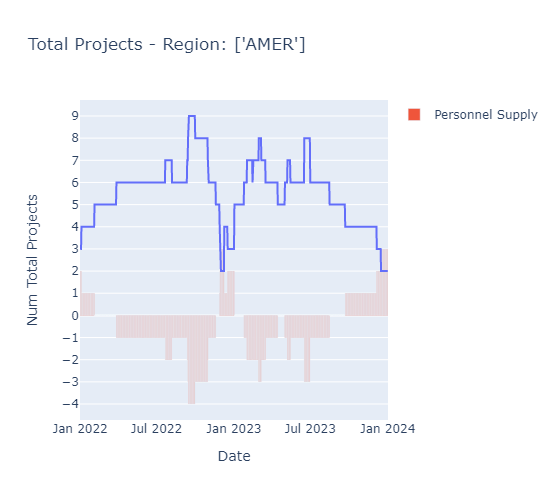

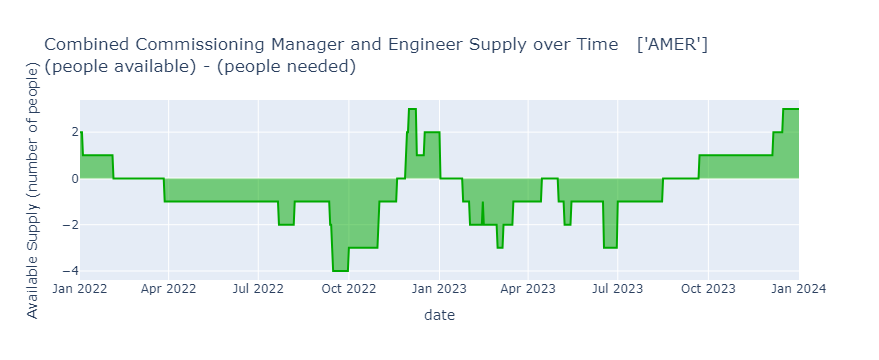

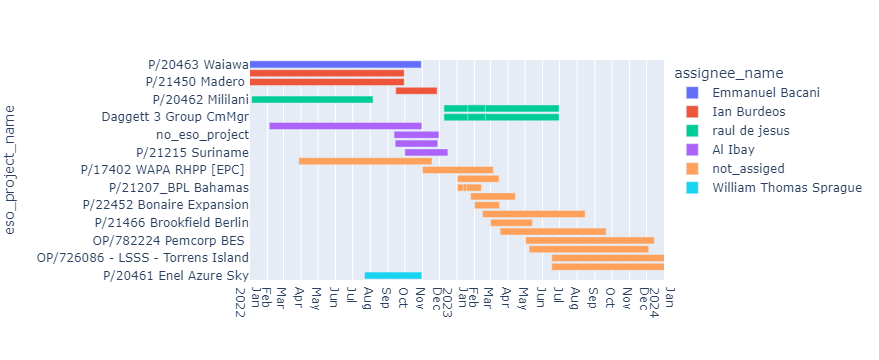

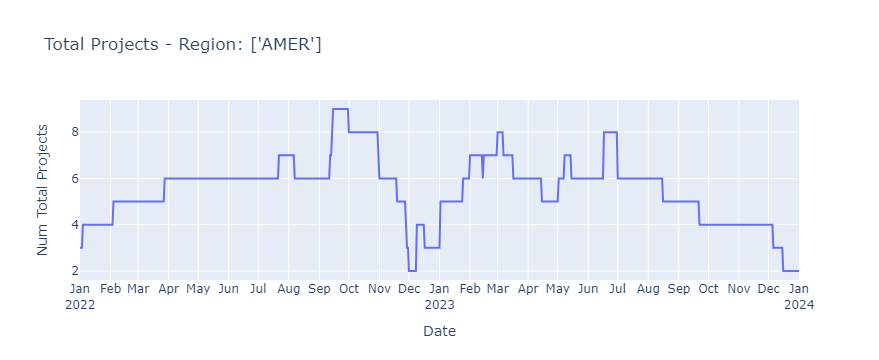

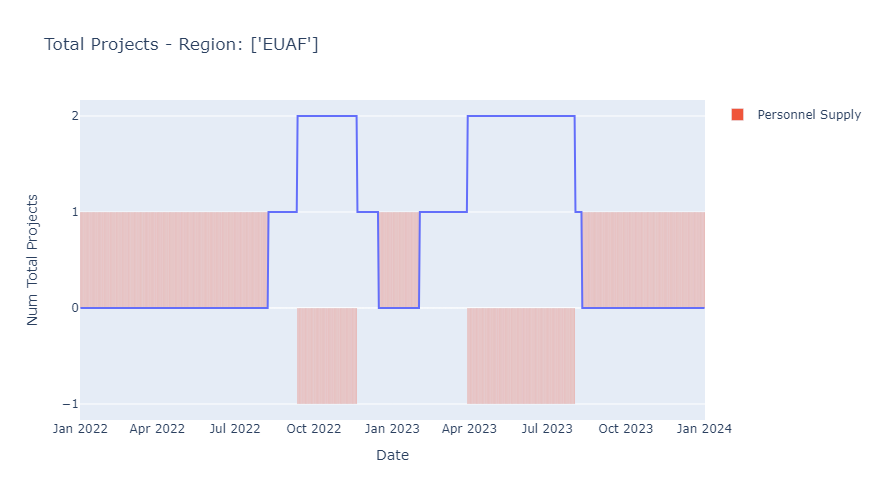

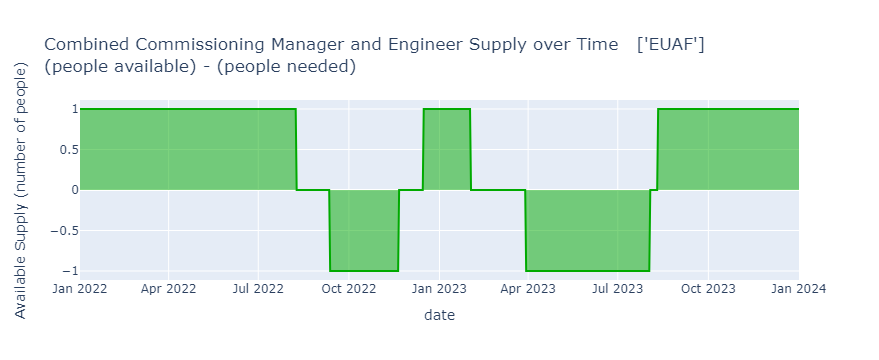

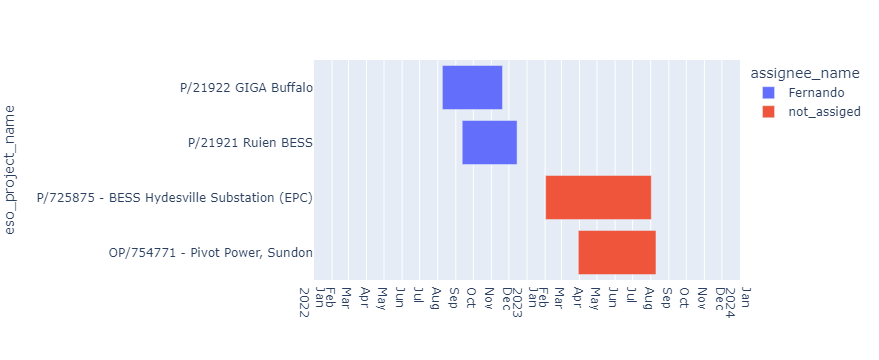

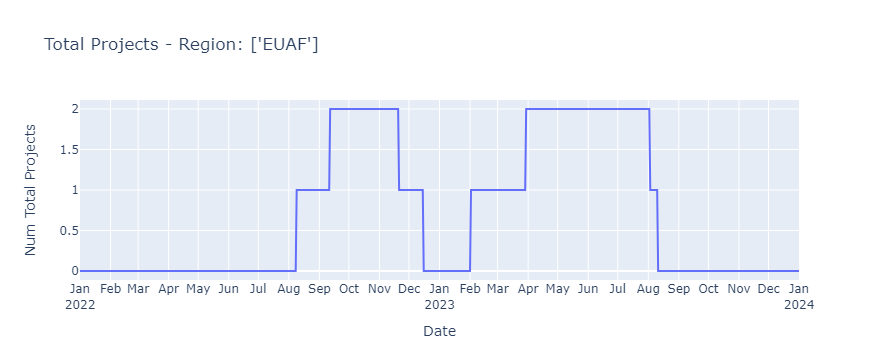

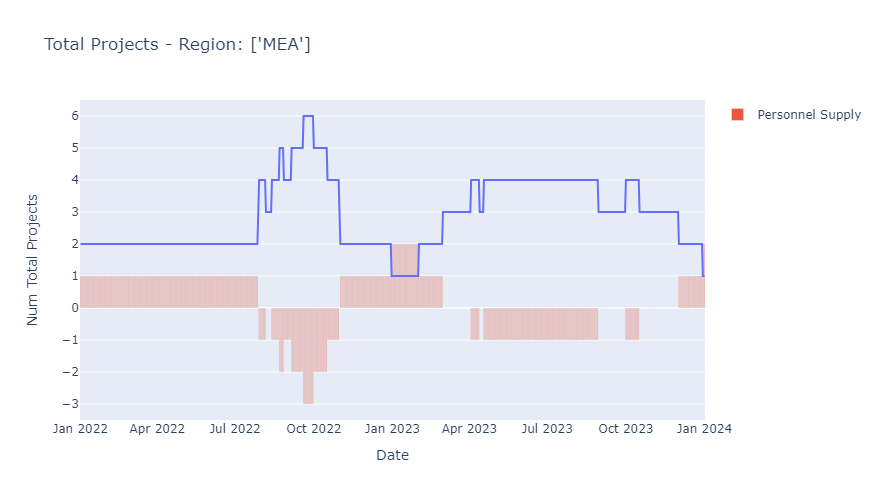

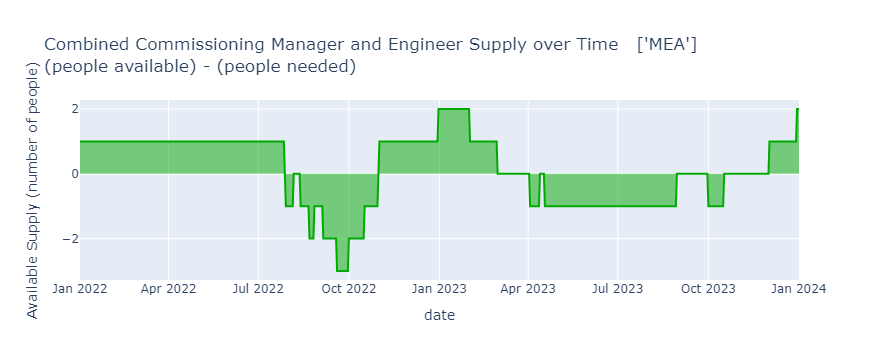

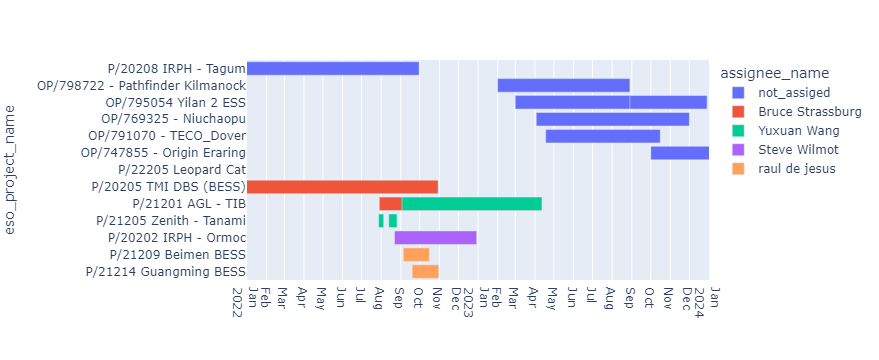

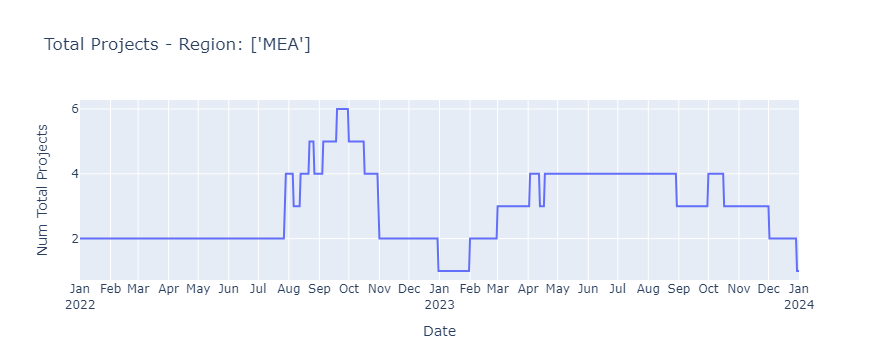

In [8]:
df_forbi, df_tk_bi = make_usage_analysis_table(df_tasks.copy(), show_graphs=True, save_graphs=True)

# Making All Regions Plots and Data

In [22]:
df_all_regs = df_forbi.groupby(by='date').sum().reset_index()
df_all_regs

date  num_total_projects  num_projects_no_assignee  \
0   2022-01-01                   5                         4   
1   2022-01-02                   5                         4   
2   2022-01-03                   5                         4   
3   2022-01-04                   6                         5   
4   2022-01-05                   6                         5   
..         ...                 ...                       ...   
726 2023-12-28                   4                         0   
727 2023-12-29                   4                         0   
728 2023-12-30                   3                         0   
729 2023-12-31                   3                         0   
730 2024-01-01                   3                         0   

     num_persons_occupied  num_persons_available  num_persons_supply  
0                       1                      8                   4  
1                       1                      8                   4  
2                       1                      8                   4  
3                       1                      8                   3  
4                       1                      8                   3  
..                    ...                    ...                 ...  
726                     4                      5                   5  
727                     4                      5                   5  
728                     3                      6                   6  
729                     3                      6                   6  
730                     3                      6                   6  

[731 rows x 6 columns]

NameError: name 'df_all_regs' is not defined

# This is where you save the new Data Files

In [ ]:
# save files
df_forbi, df_tk_bi = make_usage_analysis_table(df_tasks.copy(), show_graphs=True, save_graphs=True)
filename_usage = 'resource_forecast.csv'
filename_tasks = 'resource_tasks_forecast.csv'
filename_timestamp = 'data_timestamp.csv'

folder_string = "C:/Users/dha042/Documents/Resourcing_Prototype/staging_python/"
filepath_usage = Path(folder_string + filename_usage)
filepath_tasks = Path(folder_string + filename_tasks)
filepath_timestamp = Path(folder_string + filename_timestamp)

filepath_usage.parent.mkdir(parents=True, exist_ok=True)
filepath_tasks.parent.mkdir(parents=True, exist_ok=True)
filepath_tasks.parent.mkdir(parents=True, exist_ok=True)

df_forbi.to_csv(filepath_usage,index=False)
df_tk_bi.to_csv(filepath_tasks,index=False)

# Timestamp
print(datetime.now(timezone.utc).astimezone())

data_timestamp = datetime.now(pytz.timezone('US/Pacific'))
timestamp_date = data_timestamp.date().strftime("%d-%m-%Y")
timestamp_time = data_timestamp.strftime("%H:%M:%S")
timestamp_timezone = 'US/Pacific'

ts_list = [['date',timestamp_date],['time', timestamp_time], ['timezone', timestamp_timezone]]

df_tstamp = pd.DataFrame(ts_list, columns=['name', 'value'])
df_tstamp.to_csv(filepath_timestamp, index=False)

In [ ]:
print(datetime.now()) 

# all regions function

In [17]:
def make_allreg_usage_analysis_table(df_in, show_graphs=False, save_graphs=False, use_pj_groups=True):
    
    if use_pj_groups:
        df_tasks = make_project_groups(df_in.copy())
        print('using groups')
    else:
        df_tasks = df_in.copy()
   
    ## Unassigned - Cx
    # get all cx 'unassigned' tasks (denoted by 'Antti Pitkanen' as assignee)
    df_t = df_tasks
    df_t = df_t[df_t['assignee_name']=='Antti Pitkänen']

    ## Reference Cx Personnel
    pdb_list = wa.get_persondb_api_data()
    df_personnel_master = wa.make_persondb_df(pdb_list)
    df_p_all = df_personnel_master.copy()

    cx_all_persons = df_p_all[df_p_all['role'].isin(['Commissioning Manager', 'Commissioning Engineer'])].sort_values('region')
    cx_all_persons_count = cx_all_persons['person_name'].nunique()
    list_all_cx_persons = cx_all_persons['person_name'].tolist()

    ## Assigned - Cx
    # Get tasks assigned to Cx Managers or Cx Engineers
    roles_list = ['Commissioning Manager', 'Commissioning Engineer']
    df_ass = df_tasks.copy()
    df_ass = df_ass[df_ass['role'].isin(roles_list)]

    # exclude unassigned tasks
    df_ass = df_tasks.copy()
    exclude_assignee_list = ['Antti Pitkänen', 'unassigned']
    df_ass = df_ass[~df_ass['assignee_name'].isin(exclude_assignee_list)]

    # verify assignees against master list
    # todo determine if we need to add region filter
    df_ass = df_ass[df_ass['assignee_name'].isin(cx_all_persons['person_name'].to_list())]

    ## Assigned and Unassigned 
    df_cx_all = pd.concat([df_t, df_ass])    
    
    region_options = [['AMER', 'EUAF', 'MEA']]
    
    list_reg_collector = list()
    list_task_reg_collector = list()
    for reg in region_options:
        
        # convert to list (provisional to make use of existing code)
        #selected_regions = [reg]
        selected_regions = reg
        cx_all_persons_count_fil = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]['person_name'].nunique()
            
        df_cx_all_fil = df_cx_all[df_cx_all['region'].isin(selected_regions)]
        df_t_fil = df_t[df_t['region'].isin(selected_regions)]
        df_ass_fil = df_ass[df_ass['region'].isin(selected_regions)]
        
        #-------Troubleshooting------------
#         print("--Selected Region--")
#         print(selected_regions)
#         print("--People Count--")
#         display(cx_all_persons_count)
        
#         print("--Personnel List--")
#         display(df_cx_all_fil)
        
#         print("--Not Assigned--")
#         display(df_t_fil)
        
#         print("--Assigned--")
#         display(df_ass_fil)
        #-----------------------------------

        # get analysis values
        df_cx_combo_fil = make_personnel_analysis_df(df_cx_all_fil, df_t_fil, df_ass_fil, cx_all_persons_count_fil)
        # Add region column
        #df_cx_combo_fil['region'] = reg
        df_cx_combo_fil['region'] = 'all_regions'
        list_reg_collector.append(df_cx_combo_fil)
        
        #-----------------------------------
        # Output Section
        temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
        #temp_df_tim['region'] = reg
        temp_df_tim['region'] = 'all_regions'
        list_task_reg_collector.append(temp_df_tim)
        
        # Dash output prep
        df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
        #display(df_persons_reference)

        if show_graphs or save_graphs:
            # output prep
            df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
            table_persons_ref = df_persons_reference.to_dict('records')
            
            fig_daily_usage = px.area(df_cx_combo_fil, x='date', y='num_persons_supply', 
               title=f'Combined Commissioning Manager and Engineer Supply over Time \n {selected_regions} <br>(people available) - (people needed)',
                labels={'num_persons_supply': 'Available Supply (number of people)'})
            fig_daily_usage.update_traces(line_color='#00AA00')

            temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
            temp_df_tim = temp_df_tim.sort_values('start_date')
            fig_cx_reg_gantt = px.timeline(temp_df_tim, x_start="start_date", x_end="due_date", y="eso_project_name", color='region')
            fig_cx_reg_gantt.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
            fig_cx_reg_gantt.update_xaxes(
                dtick="M1",
                tickformat="%b\n%Y")
            #fig_cx_reg_gantt.update_yaxes(ticklabelposition="inside")
            fig_cx_reg_gantt.update_xaxes(range=['2022-01-01', '2024-01-01'])

            fig_total_pjs_reg = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Region: {selected_regions}',
                labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'})
            fig_total_pjs_reg.update_xaxes(
                dtick="M1",
                tickformat="%b\n%Y")
            
            fig_overlay = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Region: {selected_regions}',
                labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'},
                width=1000, height=500)
            x_bar = df_cx_combo_fil['date'].tolist()
            y_bar = df_cx_combo_fil['num_persons_supply'].tolist()
            fig_overlay.add_bar(x=x_bar, y=y_bar, name="Personnel Supply")
            fig_overlay.update_yaxes(dtick=1)
            
            if save_graphs:
                fig_daily_usage.write_image(f"daily_usage_{reg}.jpeg", width=1200, height=500, scale=1)
                fig_cx_reg_gantt.write_image(f"assignee_gant_{reg}.jpeg", width=1500, height=1300, scale=1)
                fig_total_pjs_reg.write_image(f"total_projects_{reg}.jpeg", width=900, height=500, scale=1)
                fig_overlay.write_image(f"overlay_supply_projects_{reg}.jpeg", width=900, height=700, scale=1)
                
            if show_graphs:
                fig_overlay.show()
                fig_daily_usage.show()
                fig_cx_reg_gantt.show()
                fig_total_pjs_reg.show()
        
    return pd.concat(list_reg_collector), pd.concat(list_task_reg_collector)

In [7]:
# Fetch Asana Data 
rsc_task_list = wa.get_api_rsc_tasks()
df_tasks = wa.make_rsc_tasks_df(rsc_task_list)
df_tasks = wa.prep_task_display_table(df_tasks)

using groups


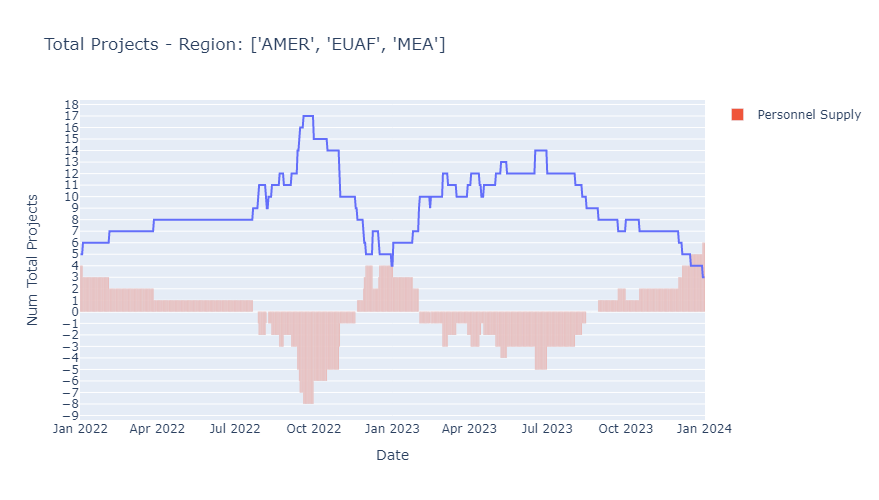

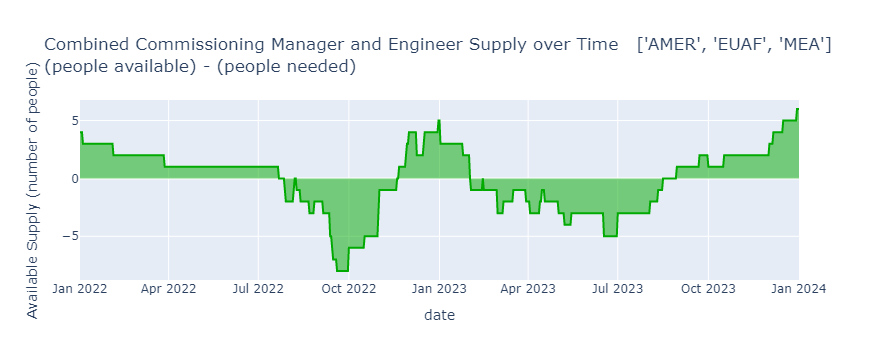

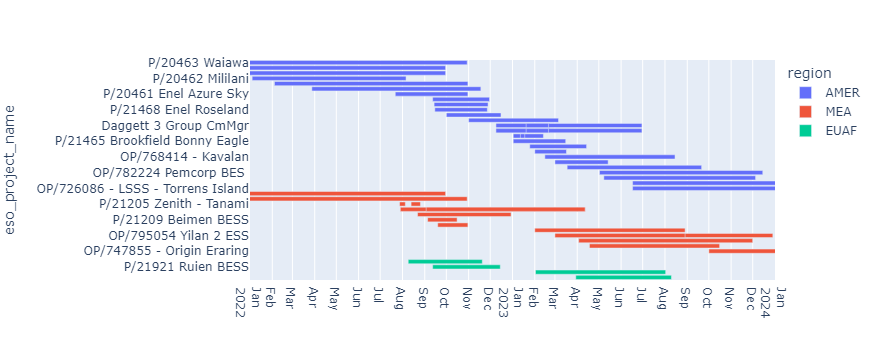

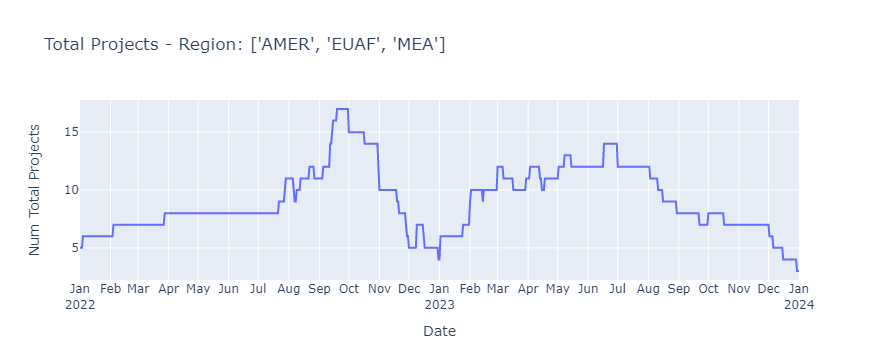

In [18]:
df_forbi_all, df_tk_bi_all = make_allreg_usage_analysis_table(df_tasks.copy(), show_graphs=True, save_graphs=True)

# Subplots

In [12]:
def make_allreg_subplots(df_in, show_graphs=False, save_graphs=False, use_pj_groups=True):
    
    if use_pj_groups:
        df_tasks = make_project_groups(df_in.copy())
        print('using groups')
    else:
        df_tasks = df_in.copy()
    ## Unassigned - Cx
    # get all cx 'unassigned' tasks (denoted by 'Antti Pitkanen' as assignee)
    df_t = df_tasks
    df_t = df_t[df_t['assignee_name']=='Antti Pitkänen']

    ## Reference Cx Personnel
    pdb_list = wa.get_persondb_api_data()
    df_personnel_master = wa.make_persondb_df(pdb_list)
    df_p_all = df_personnel_master.copy()

    cx_all_persons = df_p_all[df_p_all['role'].isin(['Commissioning Manager', 'Commissioning Engineer'])].sort_values('region')
    cx_all_persons_count = cx_all_persons['person_name'].nunique()
    list_all_cx_persons = cx_all_persons['person_name'].tolist()

    ## Assigned - Cx
    # Get tasks assigned to Cx Managers or Cx Engineers
    roles_list = ['Commissioning Manager', 'Commissioning Engineer']
    df_ass = df_tasks.copy()
    df_ass = df_ass[df_ass['role'].isin(roles_list)]

    # exclude unassigned tasks
    df_ass = df_tasks.copy()
    exclude_assignee_list = ['Antti Pitkänen', 'unassigned']
    df_ass = df_ass[~df_ass['assignee_name'].isin(exclude_assignee_list)]

    # verify assignees against master list
    # todo determine if we need to add region filter
    df_ass = df_ass[df_ass['assignee_name'].isin(cx_all_persons['person_name'].to_list())]

    ## Assigned and Unassigned 
    df_cx_all = pd.concat([df_t, df_ass])    
    
    region_options = [['AMER', 'EUAF', 'MEA']]
    
    list_reg_collector = list()
    list_task_reg_collector = list()
    for reg in region_options:
        
        # convert to list (provisional to make use of existing code)
        #selected_regions = [reg]
        selected_regions = reg
        cx_all_persons_count_fil = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]['person_name'].nunique()
            
        df_cx_all_fil = df_cx_all[df_cx_all['region'].isin(selected_regions)]
        df_t_fil = df_t[df_t['region'].isin(selected_regions)]
        df_ass_fil = df_ass[df_ass['region'].isin(selected_regions)]
        
        #-------Troubleshooting------------
#         print("--Selected Region--")
#         print(selected_regions)
#         print("--People Count--")
#         display(cx_all_persons_count)
        
#         print("--Personnel List--")
#         display(df_cx_all_fil)
        
#         print("--Not Assigned--")
#         display(df_t_fil)
        
#         print("--Assigned--")
#         display(df_ass_fil)
        #-----------------------------------

        # get analysis values
        df_cx_combo_fil = make_personnel_analysis_df(df_cx_all_fil, df_t_fil, df_ass_fil, cx_all_persons_count_fil)
        # Add region column
        #df_cx_combo_fil['region'] = reg
        df_cx_combo_fil['region'] = 'all_regions'
        list_reg_collector.append(df_cx_combo_fil)
        
        temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
        #temp_df_tim['region'] = reg
        temp_df_tim['region'] = 'all_regions'
        list_task_reg_collector.append(temp_df_tim)
        
        # Dash output prep
        df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
        #display(df_persons_reference)
        
        
        if show_graphs or save_graphs:
            # output prep
            df_persons_reference = cx_all_persons[cx_all_persons['region'].isin(selected_regions)]
            table_persons_ref = df_persons_reference.to_dict('records')
            
            fig_daily_usage = px.area(df_cx_combo_fil, x='date', y='num_persons_supply', 
               title=f'Combined Commissioning Manager and Engineer Supply over Time \n {selected_regions} <br>(people available) - (people needed)',
                labels={'num_persons_supply': 'Available Supply (number of people)'})
            fig_daily_usage.update_traces(line_color='#00AA00')

            temp_df_tim = df_cx_all_fil.replace('Antti Pitkänen','not_assiged')
            fig_cx_reg_gantt = px.timeline(temp_df_tim.sort_values('start_date'), x_start="start_date", x_end="due_date", y="eso_project_name", color='assignee_name')
            fig_cx_reg_gantt.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
            fig_cx_reg_gantt.update_xaxes(
                dtick="M1",
                tickformat="%b\n%Y")
            #fig_cx_reg_gantt.update_yaxes(ticklabelposition="inside")
            fig_cx_reg_gantt.update_xaxes(range=['2022-01-01', '2024-01-01'])

            fig_total_pjs_reg = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Region: {selected_regions}',
                labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'})
            fig_total_pjs_reg.update_xaxes(
                dtick="M1",
                tickformat="%b\n%Y")
            
            fig_overlay = px.line(df_cx_combo_fil, x='date', y='num_total_projects', title=f'Total Projects - Region: {selected_regions}',
                labels={'num_total_projects': 'Num Total Projects', 'date': 'Date'},
                width=1000, height=500)
            x_bar = df_cx_combo_fil['date'].tolist()
            y_bar = df_cx_combo_fil['num_persons_supply'].tolist()
            fig_overlay.add_bar(x=x_bar, y=y_bar, name="Personnel Supply")
            fig_overlay.update_yaxes(dtick=1)
            
            
            if save_graphs:
                fig_daily_usage.write_image(f"daily_usage_{reg}.jpeg", width=1200, height=500, scale=1)
                fig_cx_reg_gantt.write_image(f"assignee_gant_{reg}.jpeg", width=1500, height=500, scale=1)
                fig_total_pjs_reg.write_image(f"total_projects_{reg}.jpeg", width=900, height=500, scale=1)
                
            if show_graphs:
                fig_overlay.show()
                fig_daily_usage.show()
                fig_cx_reg_gantt.show()
                fig_total_pjs_reg.show()
        
    return pd.concat(list_reg_collector), pd.concat(list_task_reg_collector)

In [ ]:
df_all_sub, df_tk_all_sub = make_allreg_subplots(df_tasks.copy(), show_graphs=True, save_graphs=True)

# Troubleshooting

In [ ]:
df_forbi.columns

In [ ]:
df_tk_bi[df_tk_bi['eso_project_name'].str.contains('Daggett 3')]

In [ ]:
# df_forbi[df_forbi['date'] == '2023-09-01']

In [ ]:
regs = ['AMER', 'EUAF', 'MEA']
for r in regs:
    df_forbi_filr = df_forbi[df_forbi['region']==r]
    
    fig = px.area(df_forbi_filr, x='date', y='num_persons_supply',
           title=f'Combined Commissioning Manager and Engineer Supply over Time: {r}',
            labels={'num_persons_supply': 'Available Supply (number of people)'})
    fig.write_image(f"daily_usage_{r}.jpeg", width=900, height=500, scale=1)
    fig.show()
    
    